## 푸리에 변환
---

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/%EA%B5%AC%ED%98%84/fourierDescriptor/resource/fourier_image.png" width="800" height="900">


- 푸리에 변환

입력신호가 주어졌을때, 주기함수들의 계수를 얻을 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier3.PNG" width="450" height="550">

입력신호 s 에서, s(t=0),s(t=1)..은 샘플링된 신호.

<br>


- 푸리에 역변환

푸리에변환을 통해 얻은 주기함수들의 계수를, 다시 입력신호 s로 변환할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/%EA%B5%AC%ED%98%84/fourierDescriptor/resource/inverse.jpg" width="400" height="500">


## 푸리에 기술자(Fourier Descriptor)
---


푸리에 기술자는 객체의 외곽선 모양을 기술하는 방법중 하나이다.

외곽선은 외곽선 추적기법에 따라 구할 수 있다.


<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/%EA%B5%AC%ED%98%84/fourierDescriptor/resource/area_image.PNG" width="200" height="300">

외곽선들을 표현해보면.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier4.PNG" width="500" height="600">
이것은 i=0~n-1 까지 샘플된 입력신호라 할 수 있다.

<img src="https://raw.githubusercontent.com/bub3690/medical_lab_semina/main/semina5/resource/fourier5.PNG" width="300" height="400">

입력신호를 복소수로 나타내면, x,y대신 1차원이되고, 퓨리에 변환이 된다.



---
1. 영역검출

2. 영역 이진화

2. 영역의 외곽선 검출

3. 푸리에 변환을 통한, 특징벡터 계산

4. 푸리에 역변환



경계점:  차원 :  (16,) 
 [4.+0.j 3.+0.j 2.+0.j 3.+1.j 3.+2.j 3.+3.j 2.+4.j 1.+4.j 0.+5.j 1.+5.j
 2.+5.j 3.+5.j 4.+4.j 5.+3.j 5.+2.j 6.+1.j] 

푸리에 변환  차원 :  (16,) 
 [47.        +44.j          4.7716386 -12.75438775j
 -6.12132034 +4.12132034j  2.27135894 +3.71139022j
  0.         +1.j          0.8519497  +0.20064819j
  0.12132034 +0.94974747j -1.4507679  -1.15348846j
 -3.         +0.j         -0.7716386  -0.9024665j
 -1.87867966 -0.12132034j  1.24335969 -1.56925459j
  0.         -1.j          3.1480503  -2.54379394j
 -4.12132034 -8.94974747j 21.93604927-24.98864716j] 

푸리에 기술자 
 [[ 44.          47.        ]
 [-12.75438775   4.7716386 ]
 [  4.12132034  -6.12132034]
 [  3.71139022   2.27135894]
 [  1.           0.        ]
 [  0.20064819   0.8519497 ]
 [  0.94974747   0.12132034]
 [ -1.15348846  -1.4507679 ]
 [  0.          -3.        ]
 [ -0.9024665   -0.7716386 ]
 [ -0.12132034  -1.87867966]
 [ -1.56925459   1.24335969]
 [ -1.           0.        ]
 [ -2.54379394   3.1480503 ]
 [ -8.94974747 

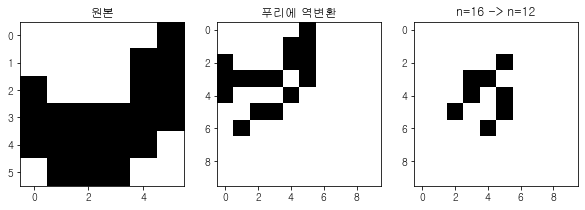

In [60]:
# 예제 binary 이미지 생성
# 외곽선, 수동으로 생성.

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import cv2
import numpy as np
from matplotlib import pyplot as plt
import time



img1=np.array([[0,0,0,0,0,1],
               [0,0,0,0,1,1],
               [1,0,0,0,1,1],
               [1,1,1,1,1,1],
               [1,1,1,1,1,0],
               [0,1,1,1,0,0],
              ])
img2 = np.zeros((10,10)).astype(np.uint8) # 역변환시 특정점을 빼면, 크기가 커질수도 있어서 넉넉히
img3 = np.zeros((10,10)).astype(np.uint8) # 푸리에 descriptor 일부만 취해서, 역변환


#직접 contour를 만들고
contour = np.array([complex(4,0),complex(3,0)
                    ,complex(2,0),complex(3,1),complex(3,2),
                    complex(3,3),complex(2,4),complex(1,4),
                    complex(0,5),complex(1,5),complex(2,5),
                    complex(3,5),complex(4,4),complex(5,3),
                    complex(5,2),complex(6,1)]) # s= y + jx (복소수) 

print('경계점: ','차원 : ',contour.shape,'\n',contour,'\n')

t = np.array(np.fft.fft(contour)) # 계수 t
print('푸리에 변환 ','차원 : ', t.shape,'\n', t,'\n')
descriptor = np.array([[x.imag,x.real] for x in t])
print('푸리에 기술자 \n', descriptor,'\n')

#푸리에 역변환
t_i=np.fft.ifft(t)
t_i_round=np.array([[round(x.real),round(x.imag)] for x in t_i])

for pix in t_i_round:
    img2[tuple(pix)]=1



#일부만 역변환 할 경우.
t_some =  t[:12]
t_i=np.fft.ifft(t_some)
t_i_round=np.array([[round(x.real),round(x.imag)] for x in t_i])

for pix in t_i_round:
    img3[tuple(pix)]=1




fig =plt.figure(figsize=(10,10))

plt.subplot(231) #원본
plt.imshow(img1,'binary')
plt.title('원본')

plt.subplot(232)
plt.imshow(img2,'binary')
plt.title('푸리에 역변환')

plt.subplot(233)
plt.imshow(img3,'binary')
plt.title('n=16 -> n=12')

    
plt.show()


## 이미지 

참고

https://brunch.co.kr/@f6cf51e0a3154dc/22

https://blog.naver.com/adoda/10092498403

https://wikidocs.net/14634

https://bkshin.tistory.com/entry/OpenCV-22-%EC%BB%A8%ED%88%AC%EC%96%B4Contour?category=1148027
